In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 

sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_zoom_only

result_filepath = "/Odyssey/private/t22picar/data/sst_L4/SST_L4_OSTIA_2019_4th.nc"
specific_time = '2019-01-01'
sst_ostia = xr.open_dataset(result_filepath).sel(time=specific_time)

result_filepath = "/Odyssey/private/t22picar/data/sst_L4/SST_L4_OSTIA_2019_4th.nc"
specific_time = '2019-01-01'
sst_mur = xr.open_dataset(result_filepath).sel(time=specific_time)


specific_time = '2018-12-31'
folder_data_4th = "/Odyssey/private/t22picar/data/glorys_0m/glorys_multivar_0m_2010-2018.nc"
sst_glorys = xr.open_dataset(folder_data_4th).sel(time=specific_time).thetao

# Get longitudes and latitudes
lon = sst_glorys.lon.values
lat = sst_glorys.lat.values
lon2D, lat2D = np.meshgrid(lon, lat)

#Mask high lat

sst_glorys = sst_glorys.where(sst_glorys.lat < 70, drop=True)
sst_glorys = sst_glorys.where(sst_glorys.lat > -70, drop=True)

#Mask high lat

sst_ostia = sst_ostia.where(sst_ostia.lat < 70, drop=True)
sst_ostia = sst_ostia.where(sst_ostia.lat > -70, drop=True)



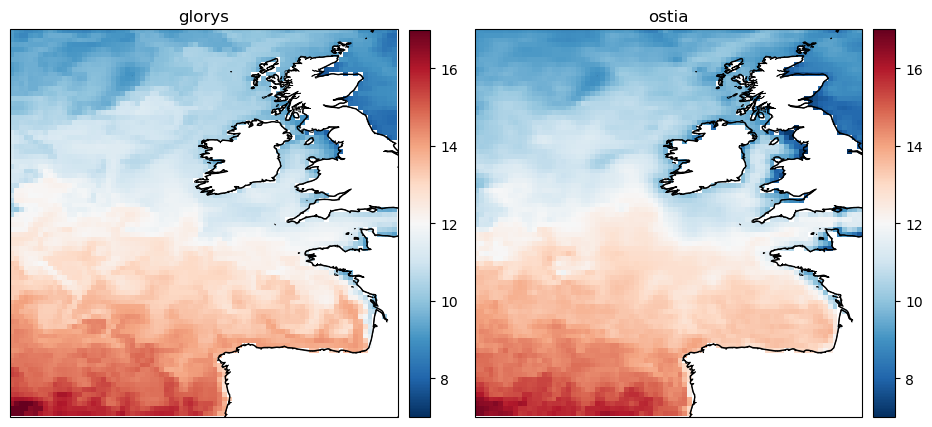

In [3]:
import cartopy.crs as ccrs
# Créer une figure avec quatre sous-graphiques
fig, axs = plt.subplots(1, 2,subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11*1,7.5*1))  # 2 lignes et 2 colonnes de sous-graphiques

vmin=7
vmax=17
plot_map_zoom_only(sst_glorys,sst_glorys.lon,sst_glorys.lat,axs=axs[0],fig=fig,title="glorys",vmin=vmin,vmax=vmax)

plot_map_zoom_only(sst_ostia.thetao,sst_ostia.lon,sst_ostia.lat,axs=axs[1],fig=fig,title="ostia",vmin=vmin,vmax=vmax)

(array([0.00000000e+00, 0.00000000e+00, 2.90340674e-04, 8.20666061e-02,
        1.85500471e-02, 2.59491977e-02, 3.98855501e-02, 4.73073835e-02,
        4.75069927e-02, 3.10982081e-02, 2.72874868e-02, 2.51598340e-02,
        2.24061342e-02, 2.26057434e-02, 2.27327674e-02, 2.42071537e-02,
        2.40302273e-02, 2.44294457e-02, 2.56996862e-02, 2.13808687e-02,
        2.02784814e-02, 2.34359363e-02, 2.12538446e-02, 2.00380431e-02,
        2.09861868e-02, 2.11903326e-02, 2.14579904e-02, 1.96478978e-02,
        2.07775045e-02, 2.00834088e-02, 1.98611167e-02, 2.02920911e-02,
        1.85364374e-02, 1.73160992e-02, 1.85273642e-02, 1.86453151e-02,
        1.78241954e-02, 1.74068307e-02, 1.69758563e-02, 1.63452726e-02,
        1.74159039e-02, 1.75383913e-02, 1.89900947e-02, 1.74204404e-02,
        1.68442956e-02, 1.74703427e-02, 1.67354179e-02, 1.74431233e-02,
        1.87179003e-02, 2.00335065e-02, 1.86589249e-02, 1.85727300e-02,
        1.76835617e-02, 1.75383913e-02, 1.93212645e-02, 2.085916

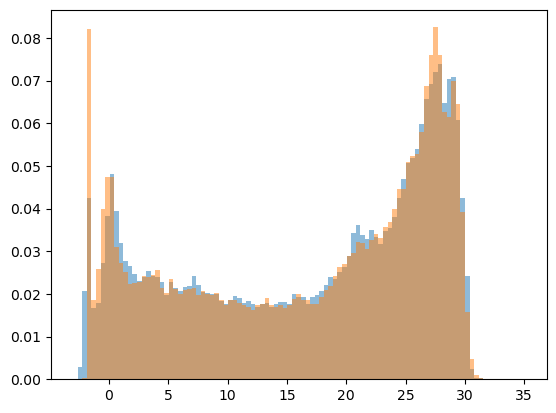

In [28]:
plt.hist(sst_glorys.values.ravel(),density=True,bins=np.linspace(-3,35,100),alpha=0.5)

plt.hist(sst_ostia.thetao.values.ravel(),density=True,bins=np.linspace(-3,35,100),alpha=0.5)

In [56]:
# Paramètre de variance pour le bruit
sigma = 0.05  # Remplacez par la valeur de sigma souhaitée
noise = np.random.normal(loc=0, scale=sigma, size=sst_glorys.shape)

# Ajouter le bruit aux données
sst_glorys_noise = sst_glorys.copy()
sst_glorys_noise = sst_glorys_noise + noise
sigma_list=[0.05,0.1,0.2,0.3]

0
1
2
3


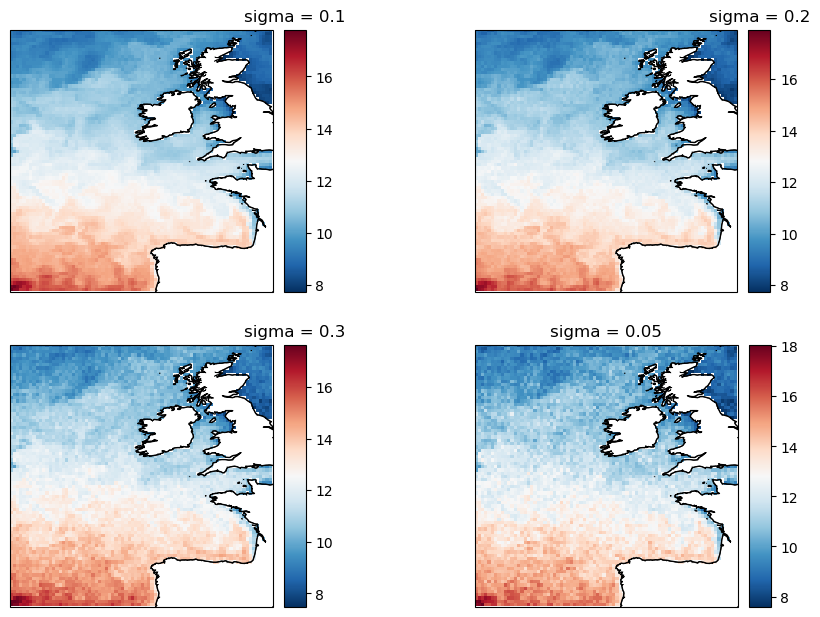

In [ ]:
import cartopy.crs as ccrs
# Créer une figure avec quatre sous-graphiques
fig, axs = plt.subplots(2, 2,subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11*1,7.5*1))  # 2 lignes et 2 colonnes de sous-graphiques

# Utiliser une boucle pour tracer les graphiques
for i, ax in enumerate(axs.flat):
    #print(i)
    sigma = sigma_list[i]
    noise = np.random.normal(loc=0, scale=sigma, size=sst_glorys.shape)
    # Ajouter le bruit aux données
    sst_glorys_noise = sst_glorys.copy()
    sst_glorys_noise = sst_glorys_noise + noise
    plot_map_zoom_only(sst_glorys_noise,sst_glorys.lon,sst_glorys.lat,axs=ax,title=f"sigma = {sigma}",fig=fig)

In [ ]:
plot_map_zoom_only(sst_glorys_noise,sst_glorys.lon,sst_glorys.lat,axs=ax,title=sigma)

AttributeError: 'Axes' object has no attribute 'set_extent'

In [30]:
np.nanstd(sst_glorys.values.ravel())

10.30850445081607

In [32]:
np.nanstd(sst_ostia.thetao.values.ravel())

10.462753293431362

In [38]:
np.nanstd(sst_glorys_noise.values.ravel())

10.309054923048526